**Objective of this Project:**
Sentiment Analysis is one of the most used applications of data science in Real-World Analysis. As the whole world is dependent on Social Media, user opinion and explanation can help us to understand their sentiments and intentions.
The tweets have been annotated as (0 = negative, 4 = positive) and they can be used to detect sentiment our objective is to predict the labels on the given test dataset



**Dataset:**
We have extracted the data from the Kaggle that contains 1,600,000 tweets and have been annoted as (0 = negative, 4 = positive).

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative,4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

- target: the polarity of the tweet (0 = negative 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)


The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

According to the creators of the dataset:

"Our approach was unique because our training data was automatically created, as opposed to having humans manual annotate tweets. In our approach, we assume that any tweet with positive emoticons, like :), were positive, and tweets with negative emoticons, like :(, were negative. We used the Twitter Search API to collect these tweets by using keyword search"





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the libraries and the Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

**Read the data set and load it**

In [ ]:

data=pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', header=None)



FileNotFoundError: ignored

**Exploratory Data Analysis**:Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.


In [ ]:
data.head() #prints the five top records of data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.columns = ["Label","id","date","flag","user","tweet"]
data.head() #prints the columns or features in the data

,Label,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = data[["Label", "tweet"]]#we are only selecting the useful columns
df.head()

,Label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Lets check the total number of rows and column in the dataframe
df.shape

(1600000, 2)

In [ ]:
df['Label'].unique()#printing the unique labels

array([0, 4])

In [ ]:
# Currently (0=negative,4=Positive) changing the notation to (0=Negative,1=Positive)
#so that we can understand the data
df['Label']=df['Label'].replace(4,1)
df.head(10)#printing the first 10 record

<ipython-input-9-7e48774ffb5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label']=df['Label'].replace(4,1)


,Label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [ ]:
#finding the dimension of train and test dataset

df['Label'].value_counts()

#Train set has 1600,000 tweets

0    800000
1    800000
Name: Label, dtype: int64

In [ ]:
# Lets check the datatypes of columns in the dataframe
df.dtypes

Label     int64
tweet    object
dtype: object

In [ ]:
#Checking for Null values

np.sum(df.isnull().any(axis=1))

0

In [ ]:
#prints the data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Label   1600000 non-null  int64 
 1   tweet   1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
df.describe()

#describes the dataset

,Label
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


In [ ]:
#finding the length of postive and negative tweets
pos_tweet = df[df['Label'] == 1]
neg_tweet = df[df['Label'] == 0]
print(len(pos_tweet), len(neg_tweet))

800000 800000


In [ ]:
#dividing the length of positive and negative tweets
#pos_tweet = pos_tweet.iloc[:int(len(pos_tweet)/20)]
#neg_tweet = neg_tweet.iloc[:int(len(neg_tweet)/20)]
#print(len(pos_tweet), len(neg_tweet))*/

In [ ]:
#df = pd.concat([pos_tweet, neg_tweet])
#len(df) #concatinating the positive and negative tweets

In [ ]:
# finding  the distribution of tweets in the train set

temp = df.groupby('Label').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Label,tweet
0,0,800000
1,1,800000


In [ ]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"Label")

,Total,Percentage
0,800000,50.0
1,800000,50.0


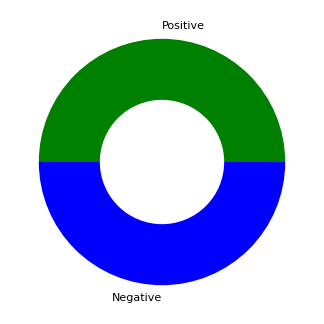

In [ ]:
#create data for Pie Chart
plt.figure(figsize=(10, 5), dpi=80)
pichart = count_values_in_column(df,"Label")
names= ["Positive","Negative"]
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<Axes: xlabel='Label', ylabel='count'>

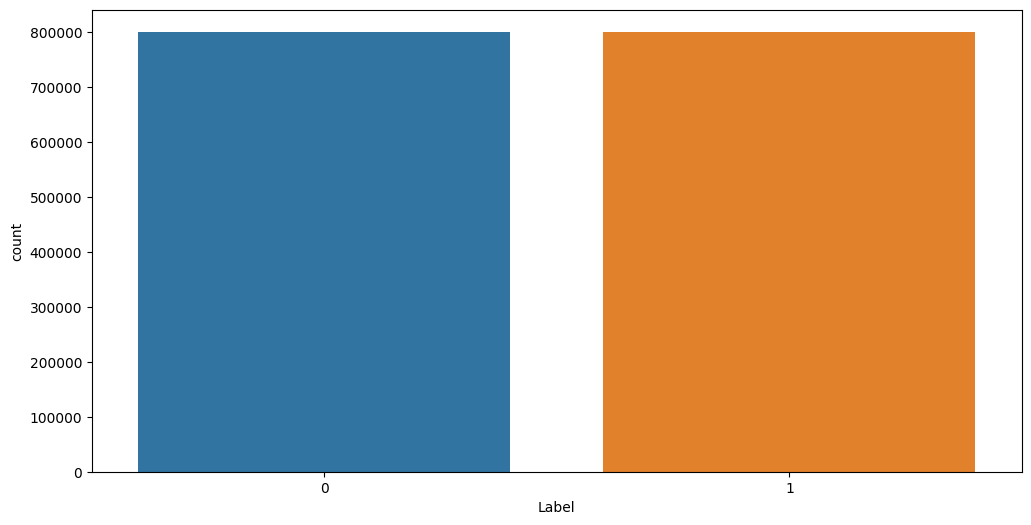

In [ ]:
plt.figure(figsize=(12,6))#equal number of positive and negative tweets
sns.countplot(x='Label',data=df)

In [ ]:
#calculating the no of words in each tweet
df["WordList"] = df["tweet"].str.split(' ')
df["WordCount"] =df["WordList"].str.len()
df.head()

<ipython-input-22-5a7347aa40b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WordList"] = df["tweet"].str.split(' ')
<ipython-input-22-5a7347aa40b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WordCount"] =df["WordList"].str.len()


,Label,tweet,WordList,WordCount
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[@switchfoot, http://twitpic.com/2y1zl, -, Aww...",20
1,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, can't, update, his, Face...",22
2,0,@Kenichan I dived many times for the ball. Man...,"[@Kenichan, I, dived, many, times, for, the, b...",19
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",11
4,0,"@nationwideclass no, it's not behaving at all....","[@nationwideclass, no,, it's, not, behaving, a...",22


**Data Preprocessing**

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.

**Steps Involved in Data Preprocessing:**

•	Removed the null values as no models handle the NULL values on their own.

•	Performed the tokenization process on the text data, as this process will help us better understand the data to develop the model. Tokenization is the process of splitting raw data into a list of tokens.

•	Lemmatization process was performed on the tokenized data as it allows to map the multiple words to the common root words; as a result, the words are treated similarly.

•	The stop words were removed as these words repeatedly appear in the text however, they do not add much value to it. Removing them will shift the focus to more of unique data that holds significant information.

•	All the special characters/punctuation were removed in the preprocessing step, which is the important step in the data preprocessing, and a cleaner tweet was generated.



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()#removes any characters or patterns specified by the "text_cleaning_re" regular expression from the text,
  #converts the remaining text to lowercase, and removes any leading or trailing whitespace.
  tokens = []#initializes an empty list called "tokens" that will be used to store the processed words
  for token in text.split():#splits the processed text into individual words and iterates over each word.
    if token not in stop_words:# checks if the current word is not in the list of stop words (common words that are typically removed from text data)
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
import re

In [ ]:
df.tweet = df.tweet.apply(lambda x: preprocess(x))

<ipython-input-27-86bc3436b33a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tweet = df.tweet.apply(lambda x: preprocess(x))


In [ ]:
df.head(5)

,Label,tweet,WordList,WordCount
0,0,awww bummer shoulda got david carr third day,"[@switchfoot, http://twitpic.com/2y1zl, -, Aww...",20
1,0,upset update facebook texting might cry result...,"[is, upset, that, he, can't, update, his, Face...",22
2,0,dived many times ball managed save 50 rest go ...,"[@Kenichan, I, dived, many, times, for, the, b...",19
3,0,whole body feels itchy like fire,"[my, whole, body, feels, itchy, and, like, its...",11
4,0,behaving mad see,"[@nationwideclass, no,, it's, not, behaving, a...",22


In [ ]:
lab_to_sentiment = {0:"Negative", 1:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.Label = df.Label.apply(lambda x: label_decoder(x))
df.head()



<ipython-input-29-da467bb1c6a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label = df.Label.apply(lambda x: label_decoder(x))


,Label,tweet,WordList,WordCount
0,Negative,awww bummer shoulda got david carr third day,"[@switchfoot, http://twitpic.com/2y1zl, -, Aww...",20
1,Negative,upset update facebook texting might cry result...,"[is, upset, that, he, can't, update, his, Face...",22
2,Negative,dived many times ball managed save 50 rest go ...,"[@Kenichan, I, dived, many, times, for, the, b...",19
3,Negative,whole body feels itchy like fire,"[my, whole, body, feels, itchy, and, like, its...",11
4,Negative,behaving mad see,"[@nationwideclass, no,, it's, not, behaving, a...",22


Positive Words

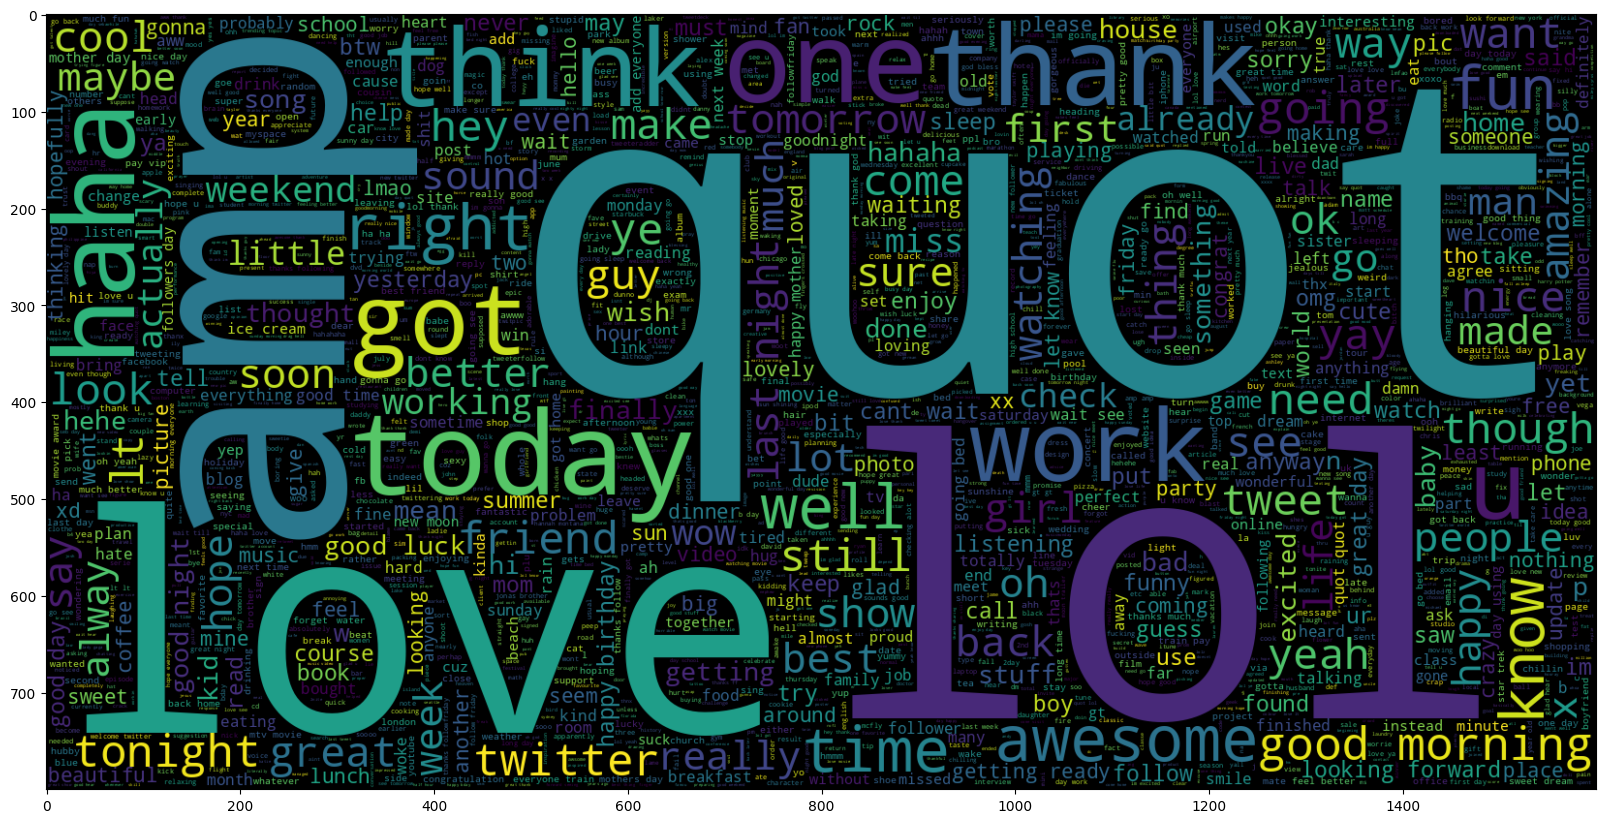

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label == 'Positive'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

Negtaive words

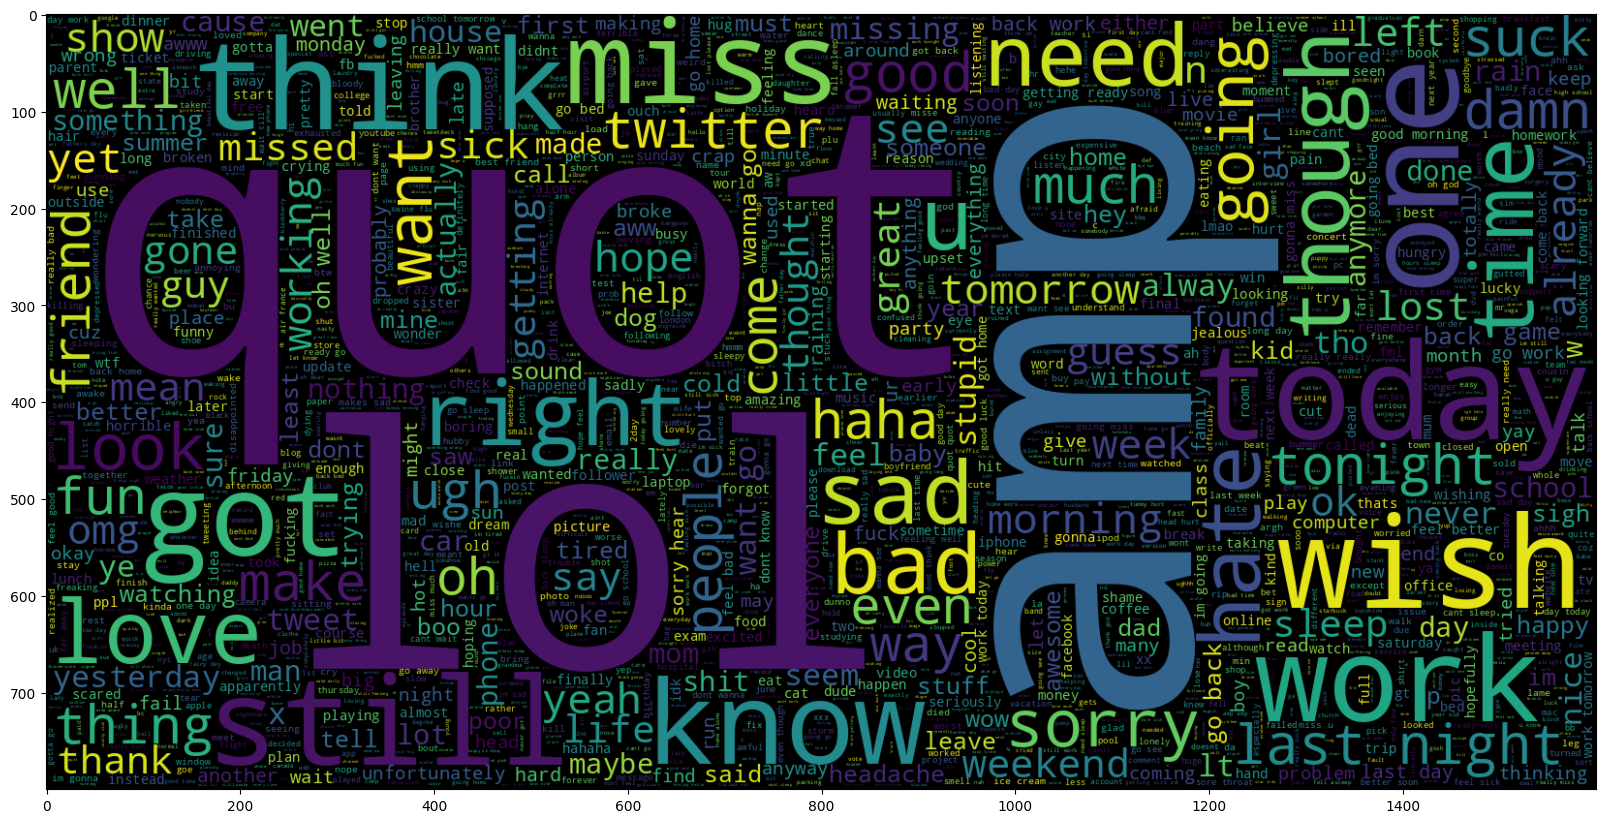

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label == 'Negative'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

Tokenization Tokenization is the process of dividing text into a set of meaningful pieces. These pieces are called tokens.
For example, we can divide a chunk of text into words, or we can divide it into sentences.

**Lemmatization**:Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.

**Stop words**:To remove the stopwords, we will use the Naural Language Tool Kit (NLTK) library. Firstly, we will divide our text data into words, compare them to list of stopwords available in the corpus module of this library and finally, remove them if it exists in the list.

**Data Visualization**:A) Understanding the common words used in the tweets: WordCloud. A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

**Splitting the Dataset**

In [ ]:
#let us split the train and test data
TRAIN_SIZE = 0.8#80% of the data will be used for training and the remaining 20% will be used for testing the model
MAX_NB_WORDS = 100000# tokenizer will only consider the top 100,000 most frequent words in the dataset. This is used to limit the size of the vocabulary and speed up training.
MAX_SEQUENCE_LENGTH = 30 #maximum length of a sequence (or input text) will be 30 words. This is used to ensure that all input sequences have the same length, which is necessary for training the model using batch processing.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

train_data, test_data = train_test_split(df, test_size=0.2,
                                         random_state=1) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))


Train Data size: 1280000
Test Data size 320000


In [ ]:
train_data.head(5)

,Label,tweet,WordList,WordCount
1556092,Positive,use like,"[@JessicaKnows, I, use, it, and, do, like, it., ]",9
868905,Positive,almost home aaand need pee rather badly also r...,"[Almost, home, , aaand, I, need, to, pee, rath...",16
218471,Negative,dropping marmite cheese covered bread floor fa...,"[dropping, the, marmite, and, cheese, covered,...",20
620327,Negative,issues xfire broadcast cancelled,"[Having, issues, with, Xfire, broadcast., Canc...",9
981867,Positive,ask hermes heritage complex small eatery nothi...,"[@kunaldua, ask, for, Hermes, Heritage, comple...",19


**Tokenization**:

Tokenization is a process of breaking down a character sequence into individual pieces called tokens, while discarding certain characters like punctuation. Tokenization is commonly used in natural language processing and machine learning tasks.

Tokenization can be performed using a tokenizer, which creates a token for each word in the data corpus and maps them to an index using a dictionary. The resulting index is known as the "word index," which contains the index for each word in the data corpus.

The "vocab size" represents the total number of unique words in the data corpus. It is an important parameter to consider when building machine learning models that require vectorizing text data. A larger vocab size indicates a more diverse range of words in the corpus and can potentially improve the model's performance, but also increase computational complexity.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()#utility class used for tokenizing texts
tokenizer.fit_on_texts(train_data.tweet)#tokenizer will convert each word in the text to a unique integer value (or token), and store these mappings in its internal vocabulary
word_index = tokenizer.word_index#a dictionary containing the mapping of words to their integer values (or tokens), generated during the fit_on_texts method call.
vocab_size = len(tokenizer.word_index) + 1#calculates the total number of unique words in the vocabulary (i.e. the vocabulary size), by taking the length of the word_index dictionary and adding 1 (since the integer value 0 is reserved for padding). This value will be used later in the neural network architecture to determine the input dimension of the embedding layer.

In [ ]:
print (vocab_size)

290860


**Padding:**
Padding is done after tokenization to convert the word sequence into a list of arrays of the same length. Neural networks require fixed-length inputs, and hence padding is done to ensure that all input sequences have the same length.

In the context of NLP, padding refers to adding extra zeros or some other value to the beginning or end of shorter sequences to make them of the same length as the longest sequence. This ensures that all sequences have the same length, and the neural network can process them in a batch.

Therefore, padding ensures that each input sequence has the same length, and the neural network can process them efficiently in batches.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet),
                        maxlen =30)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet),
                       maxlen = 30)
print("Training X Shape:",X_train.shape)
print("Testing X Shape:",X_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


Label Encoding:

In [ ]:
labels = train_data.Label.unique().tolist()# extracts all unique labels from the Label column of the train_data DataFrame and converts them into a list

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.Label.to_list())#Fits the encoder on the training data's "Label" column to create the label to integer mapping
y_train = encoder.transform(train_data.Label.to_list())#Uses the fitted encoder to transform the "Label" column of the training data into integer labels.
y_test = encoder.transform(test_data.Label.to_list())#Uses the fitted encoder to transform the "Label" column of the testing data into integer labels
y_train = y_train.reshape(-1,1)#Reshapes the y_train array from a 1D array to a 2D array with a single column.
y_test = y_test.reshape(-1,1)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


**Word embedding**

Word embedding is a technique used in natural language processing to create a numerical representation of words in a way that captures their meaning and context. It allows words with similar meanings to have similar representations in the embedding space. This technique has been a significant breakthrough in deep learning for natural language processing tasks, as it has improved the accuracy of models by enabling them to better understand and interpret the meaning of words in a text. we will be using pretrained glove word embedding

The pretrained Word Embedding like GloVe & Word2Vec gives more insights for a word which can be used for classification

In [ ]:
embeddings_index = {}# creates an empty dictionary to store the word embeddings

with open('/content/drive/MyDrive/glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()#splits the line by whitespace characters
        word = values[0] #extracts the first element of values
        coefs = np.asarray(values[1:], dtype='float32')# converts the rest of the elements in values to a numpy array of float32 data type
        embeddings_index[word] = coefs
    f.close()

print('The total number of word vectors found in the GloVe file is' ,len(embeddings_index))

The total number of word vectors found in the GloVe file is 400000


**Creating the Embedding Matrix**
Creating the embedding matrix is necessary to initialize the embedding layer of the neural network with pre-trained GloVe word embeddings. This is done to leverage the pre-trained word embeddings that are trained on a large corpus of text data to improve the performance of the neural network. The embedding matrix is initialized with zeros and is filled with GloVe embeddings for words that are present in the training data.

In [ ]:
EMBEDDING_DIM=300
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)#gets the pre-trained GloVe embedding vector for the current word, if it exists in the pre-trained embeddings.
  if embedding_vector is not None:#checks if the embedding vector exists for the current word, and if it does, it sets the row of the embedding matrix corresponding to the current word index to the pre-trained embedding vector
    embedding_matrix[i] = embedding_vector
print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (290860, 300)


In [ ]:
MAX_SEQUENCE_LENGTH=30

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

**Model Training**

**CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# Define the model architecture with additional layers and batch normalization
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv1D(64, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(sequence_input, outputs)

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_delta=0.0001)

history = model.fit(X_train, y_train, batch_size=64, epochs=6, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/6


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy*100:.2f}%')

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def plot_confusion_matrix (test_labels, predictions):
  """
  plotting the confusion matrix
  Parameters - test_labels, predictions

  """
  cm = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
  sentiment_classes = ['Negative', 'Positive']
  plt.figure(figsize = (5,5))
  sns.heatmap(
      cm,
      cmap = 'Blues',
      linecolor = 'black',
      linewidth = 1,
      annot = True,
      fmt = 'd',
      xticklabels = sentiment_classes,
      yticklabels = sentiment_classes)

  plt.xlabel('Predicted', fontsize=15)
  plt.ylabel('Actual', fontsize=15)
  plt.title('Confusion matrix', fontsize=20)


# calling function to visualize the confusion matrix
plot_confusion_matrix(y_test, y_pred)

In [ ]:

print(classification_report(y_test,y_pred))

**LSTM**

In [ ]:
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Input, Dropout, LeakyReLU
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedding_sequences)

x = Dense(128)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.5)(x)

x = Dense(64)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)
model1 = Model(sequence_input, outputs)


In [ ]:
# Compile the model with binary crossentropy loss and Adam optimizer
model1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [ ]:
# Train the model with early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_delta=0.0001)

history = model1.fit(X_train, y_train, batch_size=64, epochs=6, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy*100:.2f}%')

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5).astype(int)


In [ ]:
print(classification_report(y_test,y_pred1))

In [ ]:
plot_confusion_matrix(y_test, y_pred1)